In [1]:
import xarray as xr
import numpy as np

In [2]:
from matplotlib.patches import Rectangle

In [3]:
from heat_plot_config import *

In [4]:
cd /home/wjiang33/james_plot

/home/wjiang33/james_plot


In [5]:
from plot_config import *
# format = '.tiff'

In [6]:
# from utils import *

In [7]:
xg = np.load('plotting_xg.npy')
yg = np.load('plotting_yg.npy')

In [8]:
ecco_grid = xr.open_zarr('~/ECCO_transport')

In [9]:
for fc in [6,7]:

    discontinue_face = xg[fc]<0
    xg[fc][discontinue_face]+=360

In [10]:
wau_path = '/sciserver/filedb04-01/ocean/wenrui_temp/particle_file/WA/'
map_path = wau_path+ 'map1y.zarr'
maps = xr.open_zarr(map_path)
TOTAL_VOLUME,NUMBER_OF_PARTICLE,VOLUME_EACH,idate = TOTAL_VOLUME_wau,NUMBER_OF_PARTICLE_wau,VOLUME_EACH_wau,wau_idate

In [11]:
rhs_list = [i for i in rhs_list if i !='F']
maps['I'] = maps['F']+maps['I']

In [12]:
wau_extent = [70,140,-50,5]
# projection = ccrs.PlateCarree()

In [13]:
projection = ccrs.Mercator(central_longitude=115.0, min_latitude=-80.0, max_latitude=84.0, latitude_true_scale=-30.0)

In [14]:
rhs_list = ['A','I','E','dif_v','dif_h','e_ua']

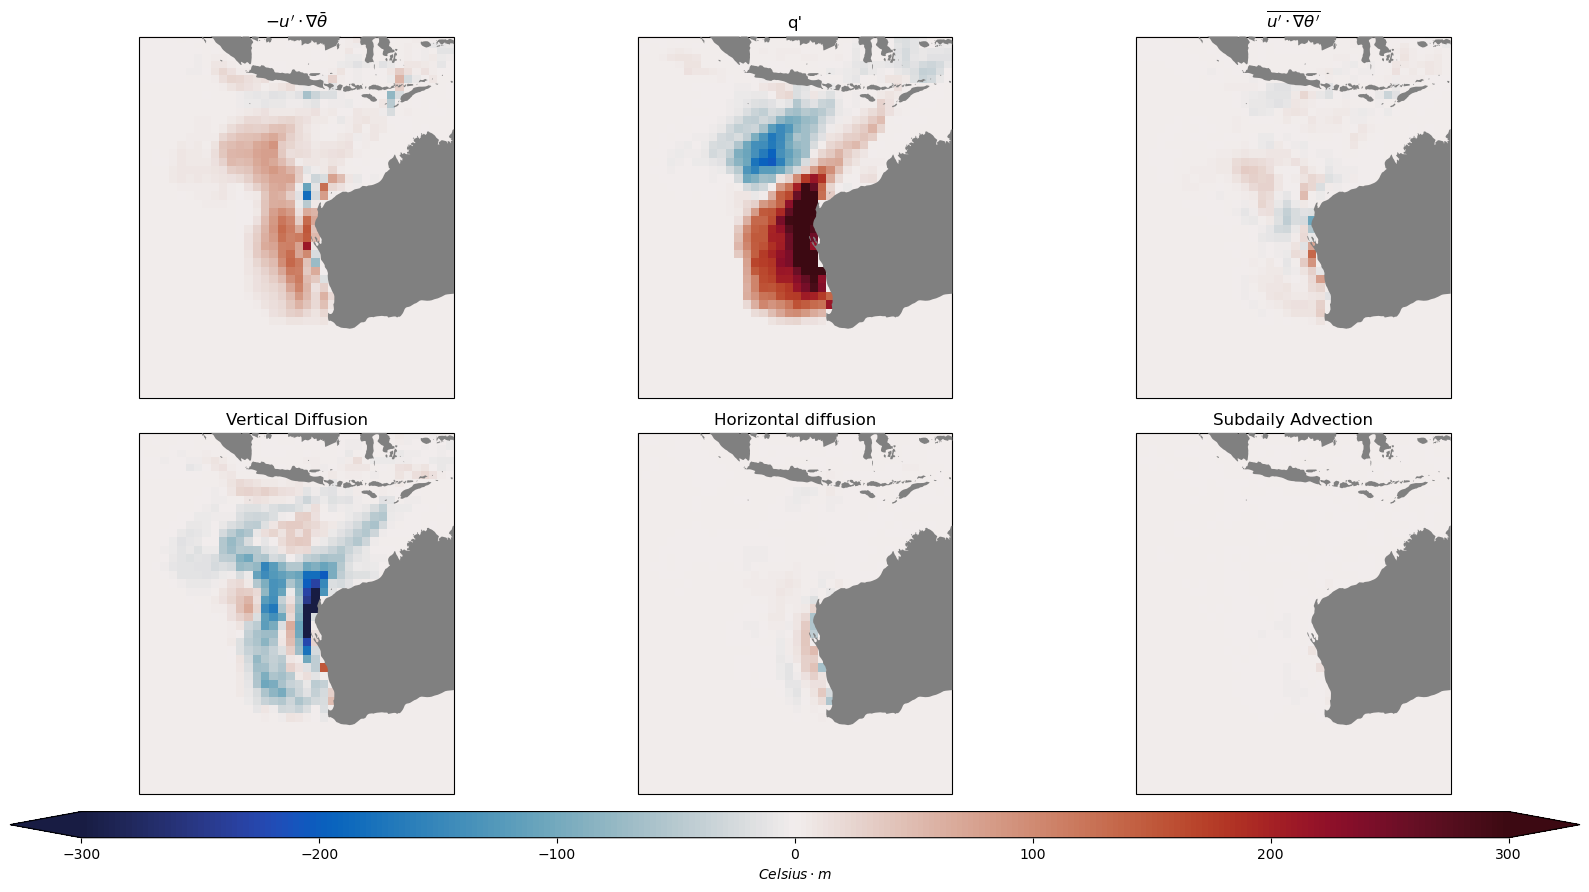

In [15]:
fig = plt.figure(figsize = (16,9))
vmax = 300
for i,var in enumerate(rhs_list):
    ax = plt.subplot(2,3,i+1,projection = projection)
    ax.set_extent(wau_extent,crs = ccrs.PlateCarree())
    sp = -maps[var].sum(dim = 'Z')
    to_plot = sp*VOLUME_EACH/ecco_grid.rA
    for i in [0,1,3,4]:
        
        p2 = ax.pcolormesh(xg[i] ,yg[i] ,to_plot[i] ,vmax = vmax,vmin = -vmax,cmap = balance, transform = ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, zorder=10, facecolor='grey')
    ax.set_title(case_term_dic[var])
    ax.set_extent([92.5,130,-40,-2.5])

dummy_ax = plt.subplot(1,1,1)
dummy_ax.axis('off')
plt.colorbar(p2,ax = dummy_ax, orientation = 'horizontal',aspect = 60,extend = 'both', label = r'$Celsius\cdot m$',anchor = (0.5,-0.5))
plt.tight_layout()
plt.savefig('figure4'+format)